<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/cosian%20dist_25%20instance_2000%20pair_%20160%20outer%20shift_Threshold%20verification%20with%20Middle_TP-FN_TN-FP_FAR-FFR-EER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.8MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =160  # outer step len
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [5]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Automatically created module for IPython interactive environment


In [6]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [12]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sampel_number_per_sec - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
train_number

44

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        e = e+1

        # Orthogonal Channel
        #DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        #DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsNormal[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        
        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, SampelNumberPerSec), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsNormal[r][i][0+j*OuterSampleShift + z*InnerSampleShift:SampelNumberPerSec+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
#model.save('/content/drive/My Drive/mymodels/160newmodel_task1.h5')

In [16]:
model = load_model('/content/drive/My Drive/mymodels/model2_2.h5')
model.summary()
model.pop()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 160, 64)       11584     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 80, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 78, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 39, 128)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 37, 256)        295168    
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject

In [0]:
path = "/content/drive/My Drive/task1-160-1000-middle_variance"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

def calc_mid_var(subject_instance_num, start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  same_list_result = []
  diff_list_result = []

  Same_ResultFileName =str(subject_instance_num)+ "outer shift 160_ Same subject _middle_variance " + "S1(" + str(start_index_s1) + '-' + str(end_index_s1) + ')'+'.csv'
  Diff_ResultFileName =str(subject_instance_num)+ "outer shift 160_ Different subject _middle_variance " + "S1(" + str(start_index_s1) + '-' + str(end_index_s1) + ')' + "_S2("+ str(start_index_s2) + '-' + str(end_index_s2) + ')'+'.csv'
  same_completeName = os.path.join(path, Same_ResultFileName )
  diff_completeName = os.path.join(path, Diff_ResultFileName )

  for i in range(subject_instance_num):

    # same subject
    same_list_dist = []
    S1_rand = random.randint(start_index_s1, end_index_s1)
    pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
    np.random.shuffle(pre_subject_img_number_array_shuffled)
    smp1 = pre_subject_img_number_array_shuffled[:200]
    
    #pre_S1_rand = subject_Predict_generator(64, model, [S1_rand], pre_subject_img_number_array_shuffled)
    
    for i in range(len(smp1)-1):
      dist = distance.euclidean(vec[S1_rand][smp1[i]] , vec[S1_rand][smp1[i+1]]) 
      same_list_dist.append(dist)
    #variance   
    same_variance_dist = statistics.variance(same_list_dist) 
    #middle
    same_middle_dist = statistics.median_low(same_list_dist)
    same_list_result.append([S1_rand,S1_rand, same_middle_dist, same_variance_dist])


    #different
    diff_list_dist = []
    S2_rand = random.randint(start_index_s2, end_index_s2)
    while S2_rand == S1_rand:
          S2_rand = random.randint(start_index_s2, end_index_s2)
    pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
    np.random.shuffle(pre_subject_img_number_array_shuffled)
    smp2 = pre_subject_img_number_array_shuffled[:200]

    #pre_S2_rand = subject_Predict_generator(64, model, [S2_rand], pre_subject_img_number_array_shuffled)
    
    for i in range(len(smp2)):
      dist = distance.euclidean(vec[S2_rand][smp2[i]] , vec[S1_rand][smp1[i]])
      diff_list_dist.append(dist)
    #variance   
    diff_variance_dist = statistics.variance(diff_list_dist) 
    #middle
    diff_middle_dist = statistics.median_low(diff_list_dist)
    diff_list_result.append([S1_rand, S2_rand, diff_middle_dist, diff_variance_dist])

  ##save resulte
  # same subject file
  with open(same_completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(same_list_result)

  # different subject file
  with open(diff_completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(diff_list_result)

  return  same_list_result , diff_list_result

Successfully created the directory /content/drive/My Drive/task1-160-1000-middle_variance 


In [0]:
same_result, diff_result = calc_mid_var(500,0,89,0,89)
print("Done")

Done


In [0]:

same_result, diff_result = calc_mid_var(500, 90,108,90,108)
print("Done")

Done


In [0]:
same_result, diff_result = calc_mid_var(1000, 0,88,90,108)
print("Done")

Done


In [0]:
same_result, diff_result = calc_mid_var(70, 0,108,0,108)
print("Done")

In [0]:
total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)



In [18]:
import h5py
#hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors2.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/Deep Results/dataset_total_vectors', data=total_vector)
#hf.close()
hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors2.h5', 'r')
vec = hf.get('/content/drive/My Drive/Deep Results/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 1171, 64), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 25
  Batch_size = 55
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+"cosian dist task1" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,40):

      threshold =0.09+ (j*0.002)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num : sample_img_num *2]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j], list_FAR[j], list_FRR[j] , list_EER[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/cosian dist task125sample num_2000pair_ouer shift160 failed
0.07200000000000001 . 
 98.75 % 
 true_result: 1975 false_result: 25 
 TP: 977 FN: 23 FRR: 0.023 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.0125 

0.07400000000000001 . 
 98.65 % 
 true_result: 1973 false_result: 27 
 TP: 975 FN: 25 FRR: 0.025 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.013500000000000002 

0.07600000000000001 . 
 99.4 % 
 true_result: 1988 false_result: 12 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.006 

0.07800000000000001 . 
 99.25 % 
 true_result: 1985 false_result: 15 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.0075 

0.08 . 
 99.3 % 
 true_result: 1986 false_result: 14 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.006999999999999999 

0.082 . 
 99.4 % 
 true_result: 1988 false_result: 12 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.006 

0.084 . 
 99.6 % 
 tru

No handles with labels found to put in legend.


0.128 . 
 99.5 % 
 true_result: 1990 false_result: 10 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 990 FP: 10 FAR: 0.01 
 EER: 0.005 



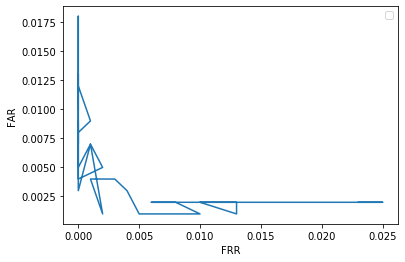

In [37]:
#1. train subject , train subject

counter_true_false_result(0,89, 0,89) 


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/cosian dist task125sample num_2000pair_ouer shift160 failed
0.07200000000000001 . 
 99.1 % 
 true_result: 1982 false_result: 18 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 1000 FP: 0 FAR: 0.0 
 EER: 0.009 

0.07400000000000001 . 
 99.25 % 
 true_result: 1985 false_result: 15 
 TP: 986 FN: 14 FRR: 0.014 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.0075 

0.07600000000000001 . 
 99.3 % 
 true_result: 1986 false_result: 14 
 TP: 986 FN: 14 FRR: 0.014 
 TN: 1000 FP: 0 FAR: 0.0 
 EER: 0.007 

0.07800000000000001 . 
 99.5 % 
 true_result: 1990 false_result: 10 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 1000 FP: 0 FAR: 0.0 
 EER: 0.005 

0.08 . 
 99.5 % 
 true_result: 1990 false_result: 10 
 TP: 990 FN: 10 FRR: 0.01 
 TN: 1000 FP: 0 FAR: 0.0 
 EER: 0.005 

0.082 . 
 99.55 % 
 true_result: 1991 false_result: 9 
 TP: 992 FN: 8 FRR: 0.008 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.0045000000000000005 

0.084 . 
 99.6 % 
 true_result: 1992 false_r

No handles with labels found to put in legend.


0.14800000000000002 . 
 99.15 % 
 true_result: 1983 false_result: 17 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.0085 



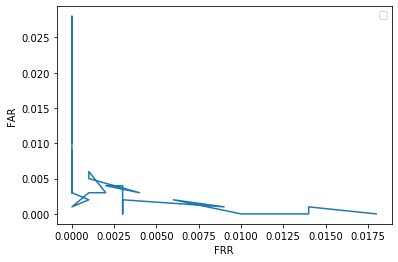

In [39]:
#2. train subject , new subject

counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/cosian dist task125sample num_2000pair_ouer shift160 failed
0.092 . 
 94.35 % 
 true_result: 1887 false_result: 113 
 TP: 889 FN: 111 FRR: 0.111 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.0565 

0.094 . 
 95.15 % 
 true_result: 1903 false_result: 97 
 TP: 904 FN: 96 FRR: 0.096 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.0485 

0.096 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 908 FN: 92 FRR: 0.092 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.048 

0.098 . 
 94.45 % 
 true_result: 1889 false_result: 111 
 TP: 892 FN: 108 FRR: 0.108 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.0555 

0.09999999999999999 . 
 96.15 % 
 true_result: 1923 false_result: 77 
 TP: 924 FN: 76 FRR: 0.076 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.0385 

0.102 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 922 FN: 78 FRR: 0.078 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.04 

0.104 . 
 96.55 % 
 true_result: 1931 false_result: 69 
 TP: 934 FN: 66 FRR: 0.066 
 

No handles with labels found to put in legend.


0.16799999999999998 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 999 FN: 1 FRR: 0.001 
 TN: 960 FP: 40 FAR: 0.04 
 EER: 0.0205 



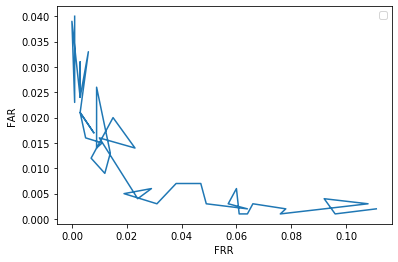

In [42]:

#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/cosian dist task125sample num_2000pair_ouer shift160 failed
0.092 . 
 93.2 % 
 true_result: 1864 false_result: 136 
 TP: 869 FN: 131 FRR: 0.131 
 TN: 995 FP: 5 FAR: 0.005 
 EER: 0.068 

0.094 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 910 FN: 90 FRR: 0.09 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.048 

0.096 . 
 93.7 % 
 true_result: 1874 false_result: 126 
 TP: 882 FN: 118 FRR: 0.118 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.063 

0.098 . 
 94.55 % 
 true_result: 1891 false_result: 109 
 TP: 899 FN: 101 FRR: 0.101 
 TN: 992 FP: 8 FAR: 0.008 
 EER: 0.05450000000000001 

0.09999999999999999 . 
 95.7 % 
 true_result: 1914 false_result: 86 
 TP: 919 FN: 81 FRR: 0.081 
 TN: 995 FP: 5 FAR: 0.005 
 EER: 0.043000000000000003 

0.102 . 
 95.8 % 
 true_result: 1916 false_result: 84 
 TP: 921 FN: 79 FRR: 0.079 
 TN: 995 FP: 5 FAR: 0.005 
 EER: 0.042 

0.104 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 

No handles with labels found to put in legend.


0.16799999999999998 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 999 FN: 1 FRR: 0.001 
 TN: 942 FP: 58 FAR: 0.058 
 EER: 0.029500000000000002 



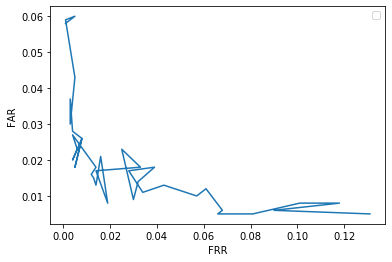

In [43]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/cosian dist task125sample num_2000pair_ouer shift160 failed
0.092 . 
 98.85 % 
 true_result: 1977 false_result: 23 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 995 FP: 5 FAR: 0.005 
 EER: 0.0115 

0.094 . 
 99.0 % 
 true_result: 1980 false_result: 20 
 TP: 984 FN: 16 FRR: 0.016 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.01 

0.096 . 
 99.0 % 
 true_result: 1980 false_result: 20 
 TP: 984 FN: 16 FRR: 0.016 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.01 

0.098 . 
 99.05 % 
 true_result: 1981 false_result: 19 
 TP: 985 FN: 15 FRR: 0.015 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.0095 

0.09999999999999999 . 
 99.25 % 
 true_result: 1985 false_result: 15 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.0075 

0.102 . 
 99.05 % 
 true_result: 1981 false_result: 19 
 TP: 985 FN: 15 FRR: 0.015 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.0095 

0.104 . 
 99.45 % 
 true_result: 1989 false_result: 11 
 TP: 992 FN: 8 FRR: 0.008 
 TN: 99

No handles with labels found to put in legend.


0.16799999999999998 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 999 FN: 1 FRR: 0.001 
 TN: 963 FP: 37 FAR: 0.037 
 EER: 0.019 



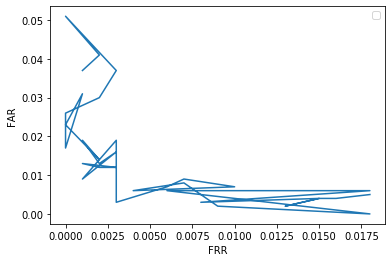

In [44]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)

In [0]:
def subject_Predict_generator(mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject


In [0]:
'''
**  subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''

'\n* train subject (ts) , new subject (ns) :\n1) ts[i] , ts[i] \n2) ts[i] , ts[j]\n3) ts , ns\n4) ns[i] , ns[i]\n5) ns[i] , ns[j]\n\n'

In [0]:
## 1) Train subject i (ts[i] )
str_subj_type = 'Train Subject i'
list_subject = subject_number_array_shuffled[5:8]
print(list_subject)


for i in range (len(list_subject) ):
    
  pre_subject_arr = [list_subject[i]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
    
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )
    
  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


[65 33  6]
['Train_Subject_i[65]\n']
['Train_Subject_i[33]\n']
['Train_Subject_i[6]\n']


In [0]:
## 2) Train Subject i and Train Subject j (ts[i] , ts[j] )

str_subj_type = 'Train Subject i and Train Subject j'
list_subject = subject_number_array_shuffled[5:9]
print(list_subject)


for i in range (len(list_subject) -1 ):
    
  pre_subject_arr1 = [list_subject[i]]
  pre_subject_arr2 = [list_subject[i+1]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr1, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr2, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )

  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


[65 33  6 35]
['Train_Subject_ij[65, 33]\n']
['Train_Subject_ij[33, 6]\n']
['Train_Subject_ij[6, 35]\n']


In [0]:
## 3) Train subject and New subject  (ts , ns)

str_subj_type = 'Train Subject and New Subject'
list_subject_train = subject_number_array_shuffled[0:4]
list_subject_new = new_subject[0:4]

print(list_subject_train , list_subject_new)


for i in range (min(len(list_subject_train),len(list_subject_new))):
    
  pre_subject_arr1 = [list_subject_train[i]]
  pre_subject_arr2 = [list_subject_new[i]]
  list_dist =[]

  # Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr1, pre_subject_img_number_array_shuffled)

  # Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)
 
  pre_S2 = subject_Predict_generator(model, pre_subject_arr2, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile_TS-NS" + str(pre_subject_arr1 + pre_subject_arr2) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )

  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


In [0]:

## 4) New subject i ( ns[i] )

str_subj_type = 'New Subject i'
list_subject = new_subject[0:8]
print(list_subject)


for i in range (len(list_subject) ):
    
  pre_subject_arr = [list_subject[i]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
    
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )
    
  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


In [0]:
## 5) New Subject i and New Subject j (ns[i] , ns[j] )

str_subj_type = 'New Subject i and New Subject j'
list_subject = new_subject[:5]
print(list_subject)


for i in range (len(list_subject) -1 ):
    
  pre_subject_arr1 = [list_subject[i]]
  pre_subject_arr2 = [list_subject[i+1]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr1, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr2, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )

  with open(completeName, 'r') as f:  
    print(f.readlines(2) )
